In [1]:
USE_MP = False
import silq

silq.initialize("EWJN")

qc.show_subprocess_widget()
%matplotlib nbagg

Initializing imports


<IPython.core.display.Javascript object>

Initializing functions
Initializing instruments
Connected to: Agilent Technologies E8267D (serial:SG53400039, firmware:C.06.22) in 0.05s
Initializing layout
Initializing data
Initializing analysis
Initializing parameters
Initializing plotting
Initialization complete


In [2]:
USE_MP = False
import silq

silq.initialize("EWJN")
pulses = [DCPulse(name='plunge',
                  t_start=0,
                  t_stop=20,
                  amplitude=1.5),
          SinePulse(name='sideband_pulse',
                    t_start=5,
                    t_stop=10,
                    amplitude=1.5,
                    frequency=48e6,
                    connection_requirements={'input_instrument': 'keysight',
                                             'input_channel': ['I', 'Q']}),
          DCPulse(name='read',
                  t_start=20,
                  t_stop=40,
                  amplitude=0,
                  acquire=True)]
pulse_sequence = PulseSequence(pulses)

layout.target_pulse_sequence(pulse_sequence)
layout.setup()

In [9]:
arbstudio_interface = interfaces['arbstudio']
arbstudio_interface.pulse_sequence()

PulseSequence with 4 pulses, duration: 40
	DCPulseImplementation(plunge, A=1.5, t_start=0, t_stop=20
		connection: Connection{arbstudio.ch1->chip.TGAC}())
	DCPulseImplementation(plunge, A=-2.25, t_start=0, t_stop=20
		connection: Connection{arbstudio.ch2->chip.DF}())
	DCPulseImplementation(read, A=0, t_start=20, t_stop=40
		connection: Connection{arbstudio.ch1->chip.TGAC}()
		additional_pulses:
		TriggerPulse(, t_start=20, duration=0.0001
			requirements: {'input_instrument': 'arbstudio', 'trigger': True}))
	DCPulseImplementation(read, A=-0.0, t_start=20, t_stop=40
		connection: Connection{arbstudio.ch2->chip.DF}())

In [19]:
arbstudio.stop()

In [11]:
pair_left = arbstudio._device.PairLeft
pair_right = arbstudio._device.PairRight
for ch_pair in [pair_left, pair_right]:
    return_msg = ch_pair.SetFrequencyInterpolation(1)
    print(return_msg.ErrorSource)

0
0


520


<IPython.core.display.Javascript object>


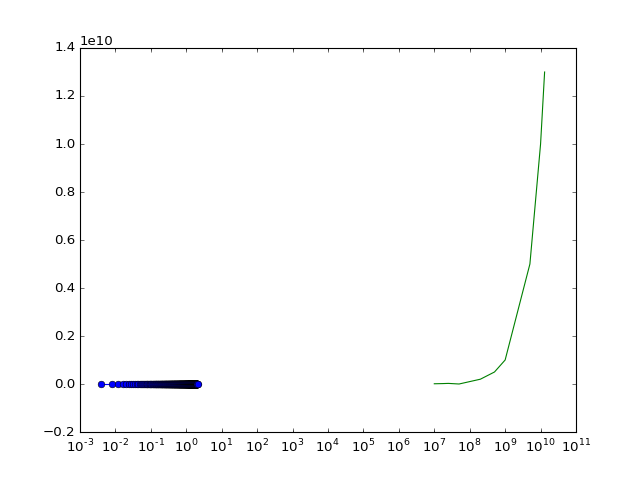

In [28]:
sampling_rate = 250e6
frequency = 48e6
periods = 100
pts = int(sampling_rate / frequency * periods)
pts += pts % 2
t_list = np.arange(0, pts) / sampling_rate

waveform = 1*np.sin(2*np.pi * t_list * frequency)
print(pts)
plt.figure()
plt.plot(t_list*1e6, waveform, 'o-')

arbstudio.stop()

ch = 3
arbstudio.functions['ch{}_clear_waveforms'.format(ch)]()
arbstudio.functions['ch{}_add_waveform'.format(ch)](waveform)
sequence = [0]
arbstudio.parameters['ch{}_sequence'.format(ch)](sequence)
arbstudio.parameters['ch{}_trigger_mode'.format(ch)]('continuous')
arbstudio.parameters['ch{}_sampling_rate_prescaler'.format(ch)](1)

ch = 4
arbstudio.functions['ch{}_clear_waveforms'.format(ch)]()
arbstudio.functions['ch{}_add_waveform'.format(ch)]([-1]*4)
sequence = [0]
arbstudio.parameters['ch{}_sequence'.format(ch)](sequence)
arbstudio.parameters['ch{}_trigger_mode'.format(ch)]('continuous')
arbstudio.parameters['ch{}_sampling_rate_prescaler'.format(ch)](1)


arbstudio.load_waveforms([3, 4])
arbstudio.load_sequence([3, 4])

# interpolation_factor = 4
# arbstudio.left_frequency_interpolation(interpolation_factor)
# arbstudio.right_frequency_interpolation(interpolation_factor)

arbstudio.run(channels=[3, 4])

In [29]:
arbstudio.stop()

In [101]:
ATS_sample_rate = 50e6
ATS.config(sample_rate=ATS_sample_rate)

continuous_controller.update_acquisition_settings(channel_selection='D',
                                                  samples_per_record=160)
continuous_controller.samples_per_trace(32000)
continuous_controller.traces_per_acquisition(2)
continuous_controller.acquisition_settings()
continuous_controller.setup()

<IPython.core.display.Javascript object>


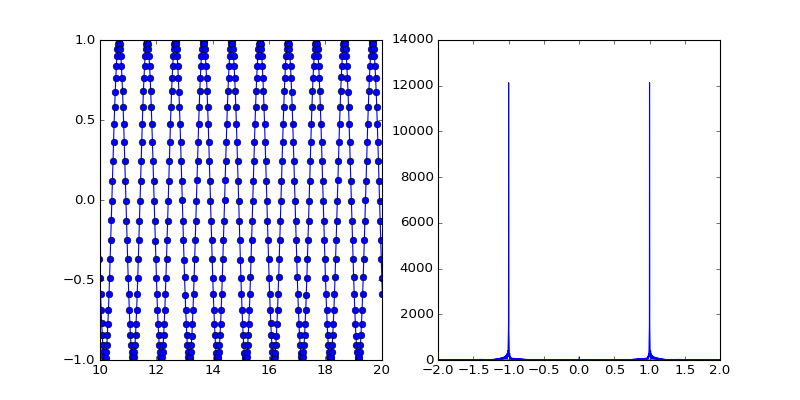

(-2, 2)

In [102]:
trace = continuous_controller.acquisition()[0]
t_list = np.arange(0, len(trace))/ATS_sample_rate
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].plot(t_list*1e6, trace, 'o-')
axes[0].set_xlim(10,20)

f_list = np.fft.fftfreq(len(trace), 1/ATS_sample_rate)
fft_signal = np.abs(np.fft.fft(trace))

axes[1].plot(f_list/1e6, fft_signal)
span = 2
axes[1].set_xlim(-span, span)

In [43]:
gn=17.23e6
ge=27.97e9
freq =np.array([10e6, 11e6, 12e6, 17e6, 25e6, 50e6, 100e6, 200e6, 500e6, 1e9, 5e9, 10e9, 13e9])
#amp_main = [-55.5, -55.5, -55.6, -56.1, -57.7]
#amp_side = [-55.5, -55.5, -55.6, -56.0, -57.7]
freq_sidepeak=np.array([8.348e6, 9.349e6, 10.349e6, 15.349e6, 23.345e6, 50e6, 88.45e6, 188.42e6, 488.42e6, 988.42e6, 4.98845e9, 9.98845e9, 12.98845e9])
peak_spacing = (freq-freq_sidepeak)/1e6


In [44]:
peak_spacing

array([  1.652,   1.651,   1.651,   1.651,   1.655,   0.   ,  11.55 ,
        11.58 ,  11.58 ,  11.58 ,  11.55 ,  11.55 ,  11.55 ])

<IPython.core.display.Javascript object>


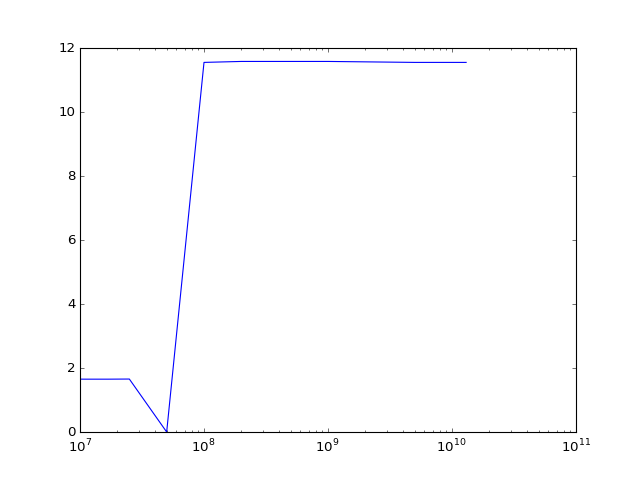

In [47]:
plt.figure()
plt.semilogx(freq,peak_spacing)